# Aliasing and the Nyquist Frequency

When we take discrete samples of a continuous signal, we lose some information about the original signal. This information loss creates some ambiguity as to what the original signal looked like before we sampled it. For a given set of samples, there are an infinite number of waveforms that could be drawn that pass through all of the data points. To better understand the issue at hand, consider a scenario where we have a sample rate of 5 Hz, and we are sampling a 1 Hz sine wave and a 6 Hz sine wave (illustrated below).

We can see that both the sine waves intersect at the exact time the samples are taken. This makes the 1 Hz sine wave and the 6 Hz sine wave indistinguishable from one another when sampling at a rate of 5 Hz. This phenomena is known *aliasing*. Signals are said to have *aliased* when they are sampled at a rate of $F_s$ and their frequency content lies outside of the *Nyquist window* $\left(0 \text{ to } \frac{F_s}{2} \right)$ Hz. $\frac{F_s}{2}$ is known as the *Nyquist frequency*. To determine which frequencies will alias to a specified frequency in the Nyquist window, the following relationship can be used:

$$f_a = f_0 + k \, F_s$$

where $k$ can be any positive or negative integer and $f_a$ is the aliased frequency that will show up within the Nyquist window at the frequency $f_0$ when sampled at a rate of $F_s$.

The frequency within the Nyquist window that a frequency outside of the Nyquist window will alias to can be determined with the following equation:

$$f_0 = f_a \, \% \, F_s$$

where $\%$ is the modulo operator.

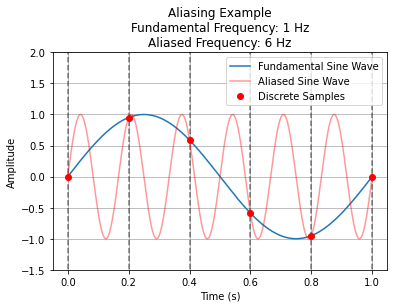

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the discrete sample rate
Fs_disc = 5
Ts_disc = 1/Fs_disc

# Sinewave frequency
f0 = 1

# Alias index
k = 1

# Alias frequency
f_alias = f0 + k * Fs_disc

# Stop time
t_stop = 1

# Discrete time
t_disc = np.arange(0, t_stop + Ts_disc, Ts_disc)

# Discrete time sine waves
x_1hz_disc = np.sin(2 * np.pi * f0 * t_disc)

# Set a sample rate that is sufficiently high, such that it appears
# to be continuous for the frequencies we are analyzing
Fs_cont = 1000 * f0
Ts_cont = 1/Fs_cont

# Simulated continuous time
t_cont = np.arange(0, t_stop, Ts_cont)

# Simulated continuous time sine waves
x_1hz_cont = np.sin(2 * np.pi * f0 * t_cont)
x_alias_cont = np.sin(2 * np.pi * f_alias * t_cont)

# Plot sample time vertical dotted lines
plt.plot(np.concatenate((t_disc, t_disc)).reshape(2, -1),
         np.array(((-2, 2),)*len(t_disc)).T, '--', c=(0, 0, 0, 0.5))

# Plot continuous and discrete sine waves
plt.plot(t_cont, x_1hz_cont, label='Fundamental Sine Wave')
plt.plot(t_cont, x_alias_cont, label='Aliased Sine Wave', c=(1, 0, 0, 0.4))
plt.plot(t_disc, x_1hz_disc, 'ro', label='Discrete Samples')

# Label and format plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Aliasing Example\nFundamental Frequency: {} Hz\nAliased Frequency: {} Hz'.format(f0, f_alias))
plt.ylim((-1.5, 2))
plt.grid()
plt.legend(loc='upper right')
pass

In [2]:
# Calculate the aliased frequency given a frequency and a sample rate
def f_alias(f, Fs):
    return f % Fs 

Fs = 5
f = 6
print('A frequency of {} Hz sampled at a rate of {} Hz aliases to a frequency of {} Hz.'.format(f, Fs, f_alias(f, Fs)))

A frequency of 6 Hz sampled at a rate of 5 Hz aliases to a frequency of 1 Hz.
